<a href="https://colab.research.google.com/github/Alaaibrahim2/Alaa/blob/main/Faster_RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow==2.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0)
ERROR: No matching distribution found for tensorflow==2.0


In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import random
from skimage import io
from shutil import copyfile
import sys
import time

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
     

In [3]:
!wget https://storage.googleapis.com/openimages/2018_04/train/train-annotations-bbox.csv

--2023-05-08 19:32:15--  https://storage.googleapis.com/openimages/2018_04/train/train-annotations-bbox.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1194033454 (1.1G) [text/csv]
Saving to: ‘train-annotations-bbox.csv’

train-annotations-b 100%[===================>]   1.11G  28.9MB/s    in 40s     

2023-05-08 19:32:55 (28.7 MB/s) - ‘train-annotations-bbox.csv’ saved [1194033454/1194033454]



In [4]:
!wget https://storage.googleapis.com/openimages/2018_04/train/train-images-boxable-with-rotation.csv

--2023-05-08 19:32:55--  https://storage.googleapis.com/openimages/2018_04/train/train-images-boxable-with-rotation.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 638407721 (609M) [text/csv]
Saving to: ‘train-images-boxable-with-rotation.csv’

train-images-boxabl 100%[===================>] 608.83M  29.8MB/s    in 21s     

2023-05-08 19:33:16 (28.9 MB/s) - ‘train-images-boxable-with-rotation.csv’ saved [638407721/638407721]



In [5]:
!wget https://storage.googleapis.com/openimages/v5/class-descriptions-boxable.csv

--2023-05-08 19:33:17--  https://storage.googleapis.com/openimages/v5/class-descriptions-boxable.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12011 (12K) [text/csv]
Saving to: ‘class-descriptions-boxable.csv’

class-descriptions- 100%[===================>]  11.73K  --.-KB/s    in 0s      

2023-05-08 19:33:17 (117 MB/s) - ‘class-descriptions-boxable.csv’ saved [12011/12011]



In [6]:
images_boxable_fname = 'train-images-boxable-with-rotation.csv'
annotations_bbox_fname = 'train-annotations-bbox.csv'
class_descriptions_fname = 'class-descriptions-boxable.csv'
     

In [7]:
images_boxable = pd.read_csv(images_boxable_fname)
images_boxable.head()

ImageID Subset                                        OriginalURL  \
0  4fa8054781a4c382  train  https://farm3.staticflickr.com/5310/5898076654...   
1  b37f763ae67d0888  train  https://c1.staticflickr.com/1/67/197493648_628...   
2  7e8584b0f487cb9e  train  https://c7.staticflickr.com/8/7056/7143870979_...   
3  86638230febe21c4  train  https://farm5.staticflickr.com/5128/5301868579...   
4  249086e72671397d  train  https://c6.staticflickr.com/4/3930/15342460029...   

                                  OriginalLandingURL  \
0  https://www.flickr.com/photos/michael-beat/589...   
1  https://www.flickr.com/photos/drstarbuck/19749...   
2  https://www.flickr.com/photos/circasassy/71438...   
3  https://www.flickr.com/photos/ajcreencia/53018...   
4  https://www.flickr.com/photos/codnewsroom/1534...   

                                        License  \
0  https://creativecommons.org/licenses/by/2.0/   
1  https://creativecommons.org/licenses/by/2.0/   
2  https://creativecommons.org/licenses/by/2.0/   
3  https://creativecommons.org/licenses/by/2.0/   
4  https://creativecommons.org/licenses/by/2.0/   

                              AuthorProfileURL        Author  \
0  https://www.flickr.com/people/michael-beat/  Michael Beat   
1    https://www.flickr.com/people/drstarbuck/         Karen   
2    https://www.flickr.com/people/circasassy/    CircaSassy   
3    https://www.flickr.com/people/ajcreencia/          Alex   
4   https://www.flickr.com/people/codnewsroom/  COD Newsroom   

                                               Title  OriginalSize  \
0                                   ...die FNF-Kerze       4405052   
1                               Three boys on a hill        494555   
2  A Christmas carol and The cricket on the heart...       2371584   
3                                    Abbey and Kenny        949267   
4  Suburban Law Enforcement Academy 20th Annivers...       6541758   

                OriginalMD5  \
0  KFukvivpCM5QXl5SqKe41g==   
1  9IzEn38GRNsVpATuv7gzEA==   
2  3hQwu0iSzY1VIoXiwp0/Mg==   
3  onB+rCZnGQg5PRX7xOs18Q==   
4  MjpaAVbMAWbCusSaxI1D7w==   

                                    Thumbnail300KURL  Rotation  
0  https://c1.staticflickr.com/6/5310/5898076654_...       0.0  
1  https://c3.staticflickr.com/1/67/197493648_628...       0.0  
2  https://c7.staticflickr.com/8/7056/7143870979_...       0.0  
3  https://c4.staticflickr.com/6/5128/5301868579_...       NaN  
4  https://c1.staticflickr.com/4/3930/15342460029...       0.0

In [8]:
annotations_bbox = pd.read_csv(annotations_bbox_fname)
annotations_bbox.head()

ImageID  Source  LabelName  Confidence      XMin      XMax  \
0  000002b66c9c498e  xclick  /m/01g317           1  0.012500  0.195312   
1  000002b66c9c498e  xclick  /m/01g317           1  0.025000  0.276563   
2  000002b66c9c498e  xclick  /m/01g317           1  0.151562  0.310937   
3  000002b66c9c498e  xclick  /m/01g317           1  0.256250  0.429688   
4  000002b66c9c498e  xclick  /m/01g317           1  0.257812  0.346875   

       YMin      YMax  IsOccluded  IsTruncated  IsGroupOf  IsDepiction  \
0  0.148438  0.587500           0            1          0            0   
1  0.714063  0.948438           0            1          0            0   
2  0.198437  0.590625           1            0          0            0   
3  0.651563  0.925000           1            0          0            0   
4  0.235938  0.385938           1            0          0            0   

   IsInside  
0         0  
1         0  
2         0  
3         0  
4         0

In [9]:
class_descriptions = pd.read_csv(class_descriptions_fname, header=None)
class_descriptions.head()
     

0           1
0    /m/011k07    Tortoise
1  /m/011q46kg   Container
2    /m/012074      Magpie
3    /m/0120dh  Sea turtle
4    /m/01226z    Football

In [10]:
def plot_bbox(img_id):
  img_url = images_boxable.loc[images_boxable["ImageID"]==img_id]['OriginalURL'].values[0]
  img = io.imread(img_url)
  height, width, channel = img.shape
  print(f"Image: {img.shape}")
  bboxs = annotations_bbox[annotations_bbox['ImageID']==img_id]
  for index, row in bboxs.iterrows():
      xmin = row['XMin']
      xmax = row['XMax']
      ymin = row['YMin']
      ymax = row['YMax']
      xmin = int(xmin*width)
      xmax = int(xmax*width)
      ymin = int(ymin*height)
      ymax = int(ymax*height)
      label_name = row['LabelName']
      class_series = class_descriptions[class_descriptions[0]==label_name]
      class_name = class_series[1].values[0]
      print(f"Coordinates: {xmin,ymin}, {xmax,ymax}")
      cv2.rectangle(img, (xmin,ymin), (xmax,ymax), (255,0,0), 5)
      font = cv2.FONT_HERSHEY_SIMPLEX
      cv2.putText(img, class_name, (xmin,ymin-10), font, 3, (0,255,0), 5)
  plt.figure(figsize=(15,10))
  plt.title('Image with Bounding Box')
  plt.imshow(img)
  plt.axis("off")
  plt.show()

In [11]:
print(images_boxable.shape)

(1743042, 12)


In [12]:

least_objects_img_ids = annotations_bbox["ImageID"].value_counts().tail(50).index.values
     


  

Image: (1496, 2256, 3)
Coordinates: (552, 228), (1847, 1274)


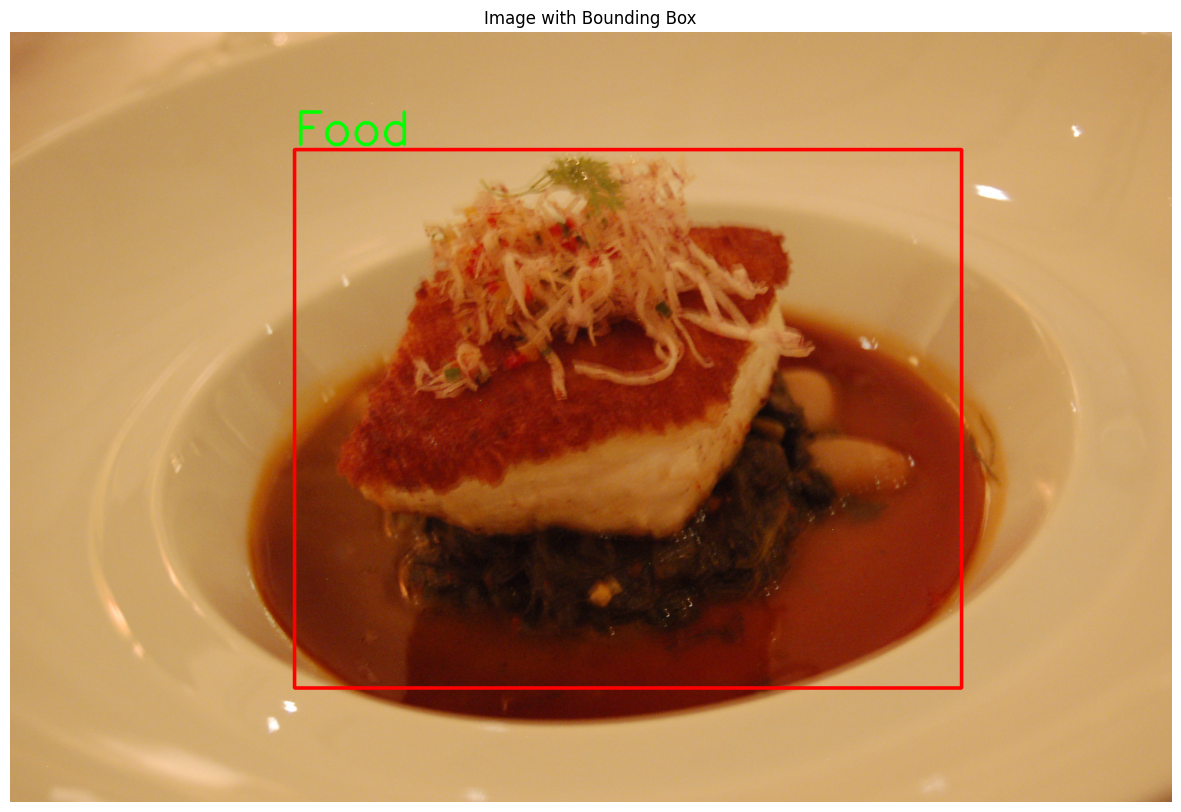

Image: (960, 1200, 3)
Coordinates: (138, 0), (1199, 958)


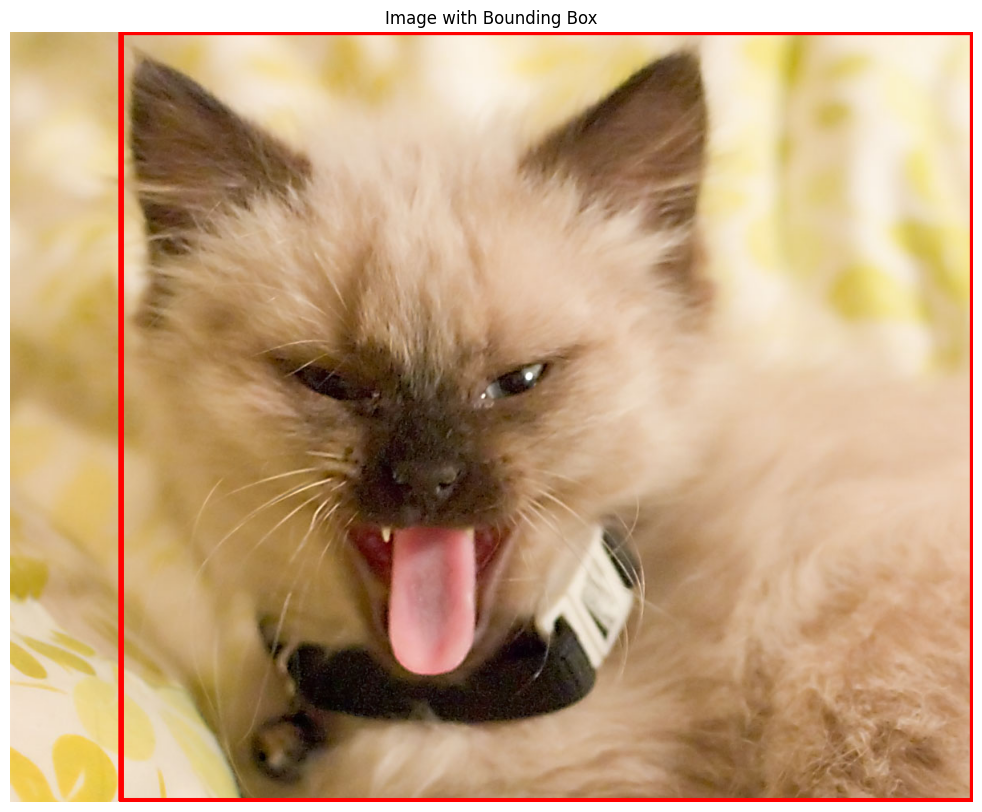

Image: (2592, 3872, 3)
Coordinates: (965, 229), (3015, 1771)


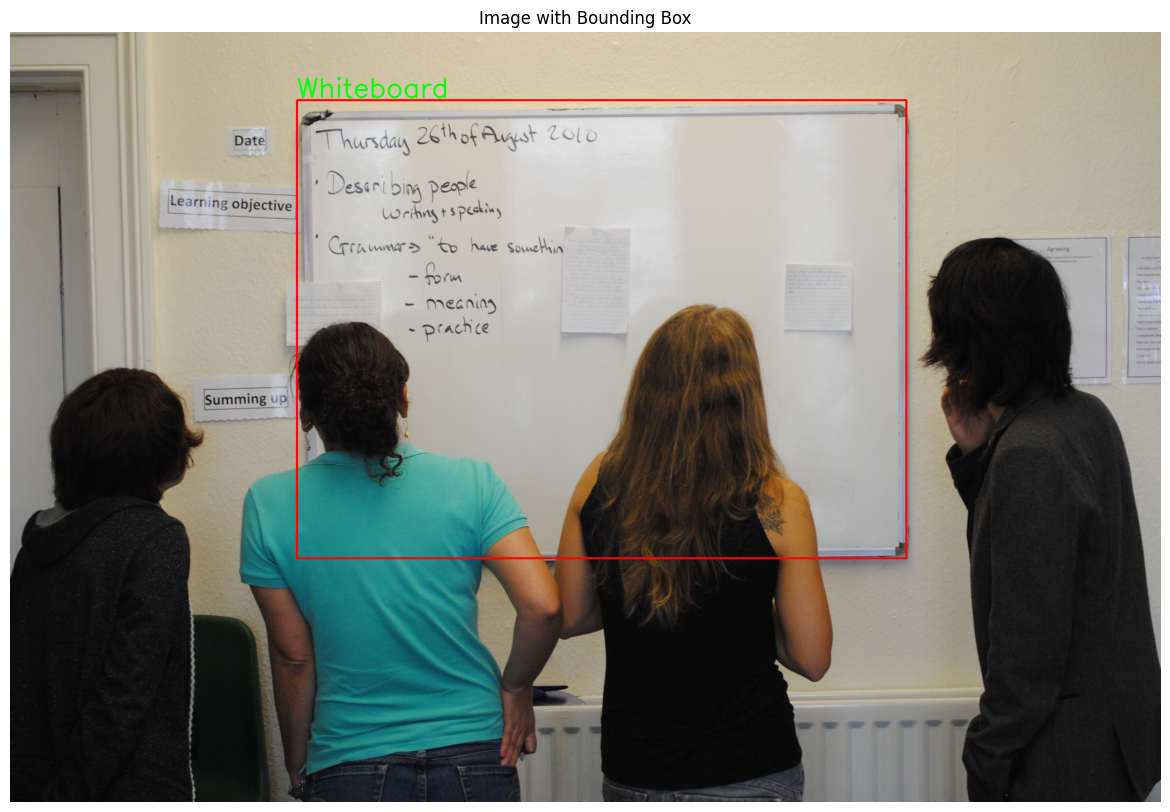

Image: (697, 1000, 3)
Coordinates: (0, 0), (999, 695)


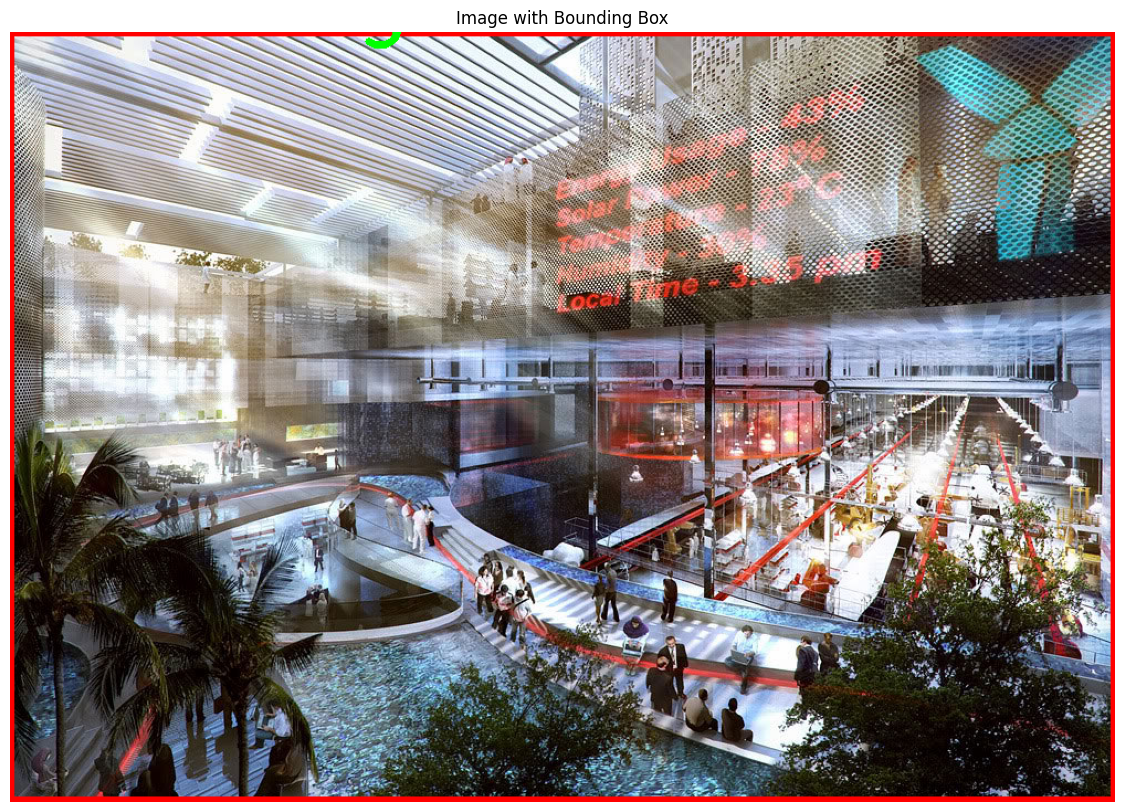

Image: (1536, 2048, 3)
Coordinates: (252, 0), (2046, 1534)


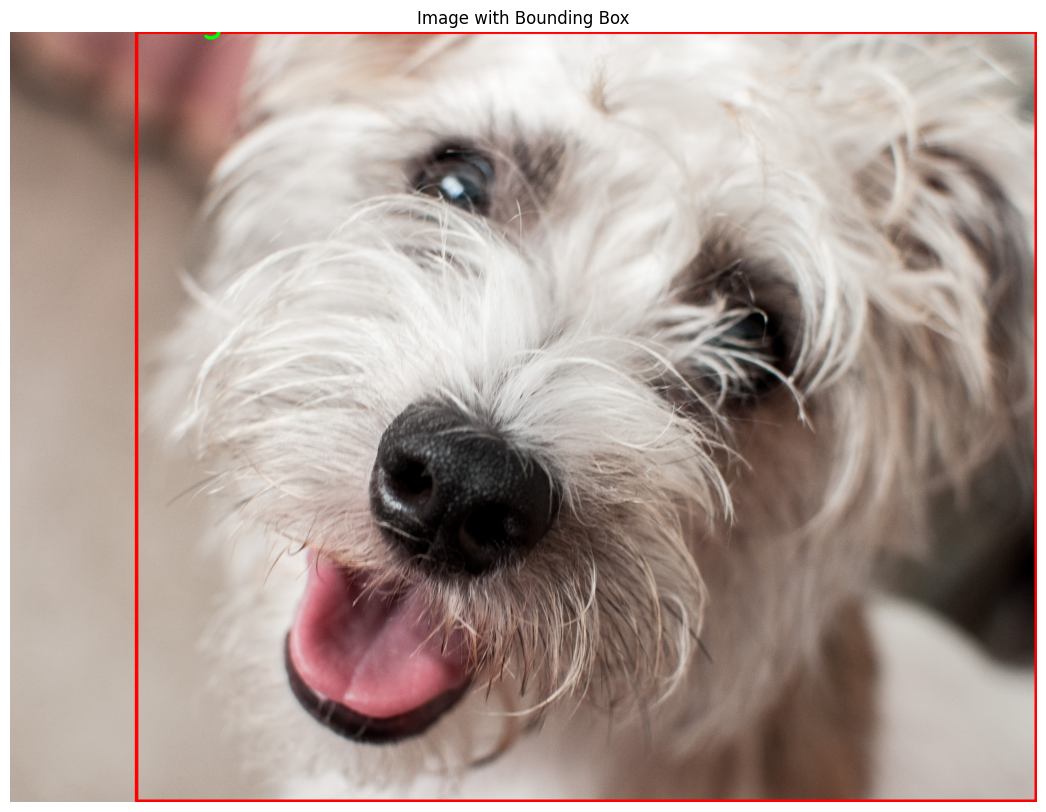

In [15]:

     

for img_id in random.sample(list(least_objects_img_ids), 5):
  plot_bbox(img_id)
  

In [16]:
class_descriptions.loc[class_descriptions[1].isin(['Person', 'Mobile phone', 'Car'])]

0             1
68   /m/01g317        Person
312   /m/050k8  Mobile phone
570    /m/0k4j           Car

In [19]:
person_pd = class_descriptions[class_descriptions[1]=='Person']
phone_pd = class_descriptions[class_descriptions[1]=='Mobile phone']
car_pd = class_descriptions[class_descriptions[1]=='Car']

label_name_person = person_pd[0].values[0]
label_name_phone = phone_pd[0].values[0]
label_name_car = car_pd[0].values[0]
     

In [20]:
person_bbox = annotations_bbox[annotations_bbox['LabelName']==label_name_person]
phone_bbox = annotations_bbox[annotations_bbox['LabelName']==label_name_phone]
car_bbox = annotations_bbox[annotations_bbox['LabelName']==label_name_car]

In [21]:
print('There are %d persons in the dataset' %(len(person_bbox)))
print('There are %d phones in the dataset' %(len(phone_bbox)))
print('There are %d cars in the dataset' %(len(car_bbox)))
person_img_id = person_bbox['ImageID']
phone_img_id = phone_bbox['ImageID']
car_img_id = car_bbox['ImageID']

There are 1034721 persons in the dataset
There are 6365 phones in the dataset
There are 248075 cars in the dataset


In [22]:
person_img_id = np.unique(person_img_id)
phone_img_id = np.unique(phone_img_id)
car_img_id = np.unique(car_img_id)
print('There are %d images which contain persons' % (len(person_img_id)))
print('There are %d images which contain phones' % (len(phone_img_id)))
print('There are %d images which contain cars' % (len(car_img_id)))
     

There are 248384 images which contain persons
There are 4312 images which contain phones
There are 89465 images which contain cars


In [23]:
n = 10
subperson_img_id = random.sample(list(person_img_id), n)
subphone_img_id = random.sample(list(phone_img_id), n)
subcar_img_id = random.sample(list(car_img_id), n)
     

In [24]:
subperson_pd = images_boxable.loc[images_boxable['ImageID'].isin(subperson_img_id)]
subphone_pd = images_boxable.loc[images_boxable['ImageID'].isin(subphone_img_id)]
subcar_pd = images_boxable.loc[images_boxable['ImageID'].isin(subcar_img_id)]

In [25]:
subperson_pd.shape

(10, 12)

In [26]:
subperson_pd.head()

ImageID Subset  \
269050  13a67c9eaee5725e  train   
343852  0fd1d8b4133594c7  train   
355771  777fcf5665c6ebc8  train   
541486  e3ddef0fe1a35331  train   
608618  732af49a306c9ee4  train   

                                              OriginalURL  \
269050  https://c7.staticflickr.com/4/3382/3286522172_...   
343852  https://farm8.staticflickr.com/8490/8278389495...   
355771  https://c1.staticflickr.com/1/33/51284707_8f86...   
541486  https://farm2.staticflickr.com/8658/1662235927...   
608618  https://farm5.staticflickr.com/3114/5781626442...   

                                       OriginalLandingURL  \
269050  https://www.flickr.com/photos/julietbanana/328...   
343852  https://www.flickr.com/photos/selmahighsoccer/...   
355771   https://www.flickr.com/photos/paparutzi/51284707   
541486  https://www.flickr.com/photos/picturesbypolo/1...   
608618  https://www.flickr.com/photos/sodexousa/578162...   

                                             License  \
269050  https://creativecommons.org/licenses/by/2.0/   
343852  https://creativecommons.org/licenses/by/2.0/   
355771  https://creativecommons.org/licenses/by/2.0/   
541486  https://creativecommons.org/licenses/by/2.0/   
608618  https://creativecommons.org/licenses/by/2.0/   

                                      AuthorProfileURL          Author  \
269050     https://www.flickr.com/people/julietbanana/  Lorena Cupcake   
343852  https://www.flickr.com/people/selmahighsoccer/     Selma Bears   
355771        https://www.flickr.com/people/paparutzi/  christina rutz   
541486   https://www.flickr.com/people/picturesbypolo/      PoloGoomba   
608618        https://www.flickr.com/people/sodexousa/      Sodexo USA   

                               Title  OriginalSize               OriginalMD5  \
269050  Dumpster Photoshoot = CLASSY       3639077  vfvwZtJTa3wrZ/BWymDCrQ==   
343852         1155825_soccer_player          7228  JL5czKwfI1vtaVfrm/yNFg==   
355771             tory z starbuck 3        186404  oLLVO5cHOqyo5NvXNrmpHQ==   
541486          Publicité Honda 1973       1686359  dXdH+kNqXBXLfkak0zNBDA==   
608618                      IMG_1294        304442  T4Cj2+/sQAlTUbubvO+qYg==   

                                         Thumbnail300KURL  Rotation  
269050  https://c6.staticflickr.com/4/3382/3286522172_...       0.0  
343852                                                NaN       NaN  
355771  https://c8.staticflickr.com/1/33/51284707_8f86...       0.0  
541486  https://c1.staticflickr.com/9/8658/16622359271...       0.0  
608618  https://c1.staticflickr.com/4/3114/5781626442_...       0.0

In [27]:
subperson_dict = subperson_pd[["ImageID", "OriginalURL"]].set_index('ImageID')["OriginalURL"].to_dict()
subphone_dict = subphone_pd[["ImageID", "OriginalURL"]].set_index('ImageID')["OriginalURL"].to_dict()
subcar_dict = subcar_pd[["ImageID", "OriginalURL"]].set_index('ImageID')["OriginalURL"].to_dict()
     

In [28]:
mappings = [subperson_dict, subphone_dict, subcar_dict]

In [30]:
classes = ['Person', 'Mobile phone', 'Car']

In [31]:
for idx, obj_type in enumerate(classes):
  n_issues = 0
  # create the directory
  if not os.path.exists(obj_type):
    os.mkdir(obj_type)
  for img_id, url in mappings[idx].items():
    try:
      img = io.imread(url)
      saved_path = os.path.join(obj_type, img_id+".jpg")
      io.imsave(saved_path, img)
    except Exception as e:
      n_issues += 1
  print(f"Images Issues: {n_issues}")
     

Images Issues: 1
Images Issues: 4
Images Issues: 0


In [32]:
!ls Person | wc -l

9


In [33]:
!ls Mobile\ phone | wc -l

6


In [34]:
!ls Car | wc -l

10


In [69]:
train_path = 'train'
test_path = 'test'

In [70]:
!mkdir train test

mkdir: cannot create directory ‘train’: File exists
mkdir: cannot create directory ‘test’: File exists


In [71]:
random.seed(1)

In [72]:
for i in range(len(classes)):
    all_imgs = os.listdir(classes[i])
    all_imgs = [f for f in all_imgs if not f.startswith('.')]
    random.shuffle(all_imgs)
    
    limit = int(n*0.8)

    train_imgs = all_imgs[:limit]
    test_imgs = all_imgs[limit:]
    
    # copy each classes' images to train directory
    for j in range(len(train_imgs)):
        original_path = os.path.join(classes[i], train_imgs[j])
        new_path = os.path.join(train_path, train_imgs[j])
        copyfile(original_path, new_path)
    
    # copy each classes' images to test directory
    for j in range(len(test_imgs)):
        original_path = os.path.join(classes[i], test_imgs[j])
        new_path = os.path.join(test_path, test_imgs[j])
        copyfile(original_path, new_path)

In [73]:
!ls train | wc -l

22


In [74]:
!ls test | wc -l

3


In [75]:
label_names = [label_name_person, label_name_phone, label_name_car]

train_df = pd.DataFrame(columns=['FileName', 'XMin', 'XMax', 'YMin', 'YMax', 'ClassName'])

# Find boxes in each image and put them in a dataframe
train_imgs = os.listdir(train_path)
train_imgs = [name for name in train_imgs if not name.startswith('.')]

for i in range(len(train_imgs)):
    sys.stdout.write('Parse train_imgs ' + str(i) + '; Number of boxes: ' + str(len(train_df)) + '\r')
    sys.stdout.flush()
    img_name = train_imgs[i]
    img_id = img_name[0:16]
    tmp_df = annotations_bbox[annotations_bbox['ImageID']==img_id]
    for index, row in tmp_df.iterrows():
        labelName = row['LabelName']
        for i in range(len(label_names)):
            if labelName == label_names[i]:
                train_df = train_df.append({'FileName': img_name, 
                                            'XMin': row['XMin'], 
                                            'XMax': row['XMax'], 
                                            'YMin': row['YMin'], 
                                            'YMax': row['YMax'], 
                                            'ClassName': classes[i]}, 
                                           ignore_index=True)

<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,
<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,
<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,
<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,
<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pa

<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,


<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,
<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,


<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,
<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,


<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,
<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,


<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,
<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,
<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,


<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,
<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,


<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,
<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,


<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,


<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,
<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,


<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,
<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,
<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,
<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,
<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pa

<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,


<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,
<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,
<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,
<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,
<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pa

<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,


<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,
<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,
<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,


<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,
<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,
<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,
<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,
<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pa

<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,


<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,
<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,
<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,
<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,
<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pa

<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,


<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,


<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,
<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,
<ipython-input-75-f07367e6015b>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append({'FileName': img_name,


In [76]:
train_df.head()

FileName      XMin      XMax      YMin      YMax     ClassName
0  04d1c1d967ecfb04.jpg  0.011250  0.160000  0.077951  0.926503  Mobile phone
1  04d1c1d967ecfb04.jpg  0.176875  0.317500  0.051225  0.917595  Mobile phone
2  04d1c1d967ecfb04.jpg  0.344375  0.467500  0.095768  0.917595  Mobile phone
3  04d1c1d967ecfb04.jpg  0.506875  0.644375  0.109131  0.917595  Mobile phone
4  04d1c1d967ecfb04.jpg  0.666250  0.820000  0.051225  0.917595  Mobile phone

In [77]:
train_img_ids = train_df["FileName"].head().str.split(".").str[0].unique()

Image: (729, 2596, 3)
Coordinates: (29, 56), (415, 675)
Coordinates: (459, 37), (824, 668)
Coordinates: (893, 69), (1213, 668)
Coordinates: (1315, 79), (1672, 668)
Coordinates: (1729, 37), (2128, 668)
Coordinates: (2180, 37), (2587, 655)


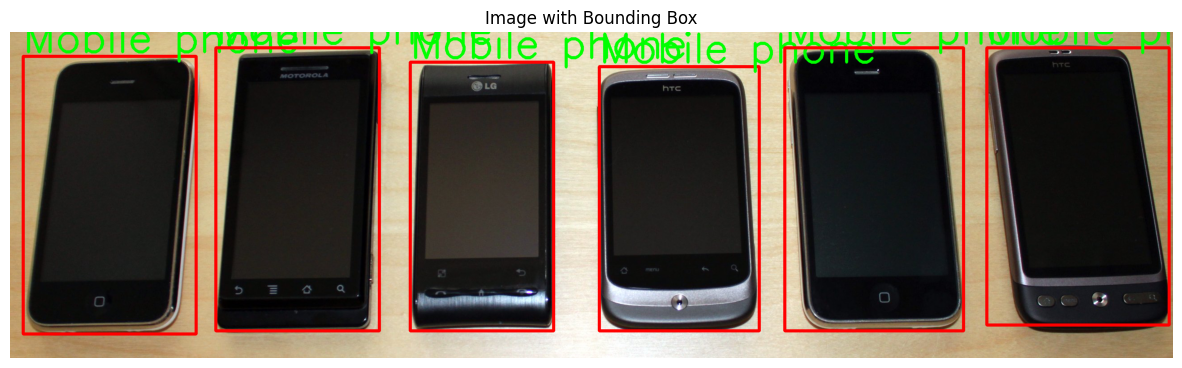

In [78]:
for img_id in train_img_ids:
  plot_bbox(img_id)

In [82]:
test_df = pd.DataFrame(columns=['FileName', 'XMin', 'XMax', 'YMin', 'YMax', 'ClassName'])

# find boxes in each image and put them in a dataframe
test_imgs = os.listdir(test_path)
test_imgs = [name for name in test_imgs if not name.startswith('.')]

for i in range(len(test_imgs)):
    sys.stdout.write('Parse test_imgs ' + str(i) + '; Number of boxes: ' + str(len(test_df)) + '\r')
    sys.stdout.flush()
    img_name = test_imgs[i]
    img_id = img_name[0:16]
    tmp_df = annotations_bbox[annotations_bbox['ImageID']==img_id]
    for index, row in tmp_df.iterrows():
        labelName = row['LabelName']
        for i in range(len(label_names)):
            if labelName == label_names[i]:
                test_df = test_df.append({'FileName': img_name, 
                                            'XMin': row['XMin'], 
                                            'XMax': row['XMax'], 
                                            'YMin': row['YMin'], 
                                            'YMax': row['YMax'], 
                                            'ClassName': classes[i]}, 
                                           ignore_index=True)

<ipython-input-82-48a8aeeacece>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append({'FileName': img_name,
<ipython-input-82-48a8aeeacece>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append({'FileName': img_name,
<ipython-input-82-48a8aeeacece>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append({'FileName': img_name,


<ipython-input-82-48a8aeeacece>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append({'FileName': img_name,
<ipython-input-82-48a8aeeacece>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append({'FileName': img_name,
<ipython-input-82-48a8aeeacece>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append({'FileName': img_name,
<ipython-input-82-48a8aeeacece>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append({'FileName': img_name,


In [83]:
train_df.to_csv('train.csv')
test_df.to_csv('test.csv')

In [84]:
train_df = pd.read_csv('train.csv')

# for training
with open("annotation.txt", "w+") as f:
  for idx, row in train_df.iterrows():
      img = cv2.imread('train/' + row['FileName'])
      height, width = img.shape[:2]
      x1 = int(row['XMin'] * width)
      x2 = int(row['XMax'] * width)
      y1 = int(row['YMin'] * height)
      y2 = int(row['YMax'] * height)
      
      google_colab_file_path = 'drive/My Drive/AI/Dataset/Open Images Dataset v4 (Bounding Boxes)/train'
      fileName = os.path.join(google_colab_file_path, row['FileName'])
      className = row['ClassName']
      f.write(fileName + ',' + str(x1) + ',' + str(y1) + ',' + str(x2) + ',' + str(y2) + ',' + className + '\n')

In [85]:
test_df = pd.read_csv('test.csv')

# for test
with open("test_annotation.txt", "w+") as f:
  for idx, row in test_df.iterrows():
      sys.stdout.write(str(idx) + '\r')
      sys.stdout.flush()
      img = cv2.imread('test/' + row['FileName'])
      height, width = img.shape[:2]
      x1 = int(row['XMin'] * width)
      x2 = int(row['XMax'] * width)
      y1 = int(row['YMin'] * height)
      y2 = int(row['YMax'] * height)
      
      google_colab_file_path = 'drive/My Drive/AI/Dataset/Open Images Dataset v4 (Bounding Boxes)/test'
      fileName = os.path.join(google_colab_file_path, row['FileName'])
      className = row['ClassName']
      f.write(fileName + ',' + str(x1) + ',' + str(y1) + ',' + str(x2) + ',' + str(y2) + ',' + className + '\n')